In [88]:
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np

from matplotlib import pyplot as plt
plt.style.use('dark_background')

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [89]:
df = pd.read_csv('distance_sensor.csv')

def func(x, a, b):
    return a*(np.exp(b*x) - 1)

df['distance motor / mm'] = 3000 + 40 - df[' distance driven motor / mm']

# df['distance infrared / mm'] = df[' distance infrared / %'] / 100 * 1000
df['distance infrared / mm'] = func(df[' distance infrared / %'].to_numpy(), *[5.25744841e+02, 1.48802736e-02])

# df

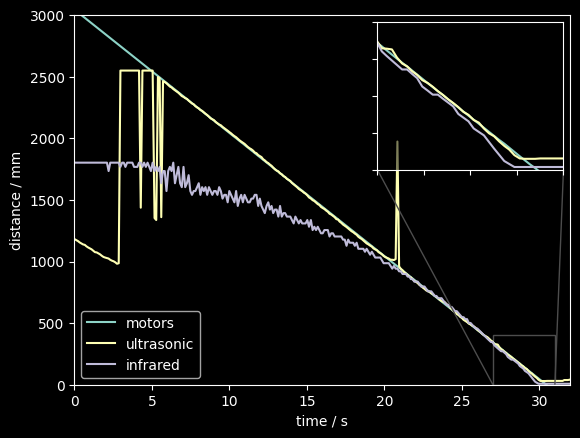

In [90]:
ax = plt.axes()
ax.plot(df['time / s'], df['distance motor / mm']       , label = 'motors'    )
ax.plot(df['time / s'], df[' distance ultrasonic / mm'] , label = 'ultrasonic')
ax.plot(df['time / s'], df['distance infrared / mm']    , label = 'infrared'  )
ax.legend(loc = 'lower left')
plt.xlabel('time / s')
plt.ylabel('distance / mm')
plt.xlim([0,32])
plt.ylim([0,3000])

axins = zoomed_inset_axes(ax, zoom = 3, loc = 'upper right')
axins.plot(df['time / s'], df['distance motor / mm']       )
axins.plot(df['time / s'], df[' distance ultrasonic / mm'] )
axins.plot(df['time / s'], df['distance infrared / mm']    )
axins.set_xlim(27, 31)
axins.set_ylim(0, 400)
axins.patch.set_alpha(0.5)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=3, loc2=4, edgecolor = '0.3')

plt.show()
# plt.savefig('distance.png', transparent=True)

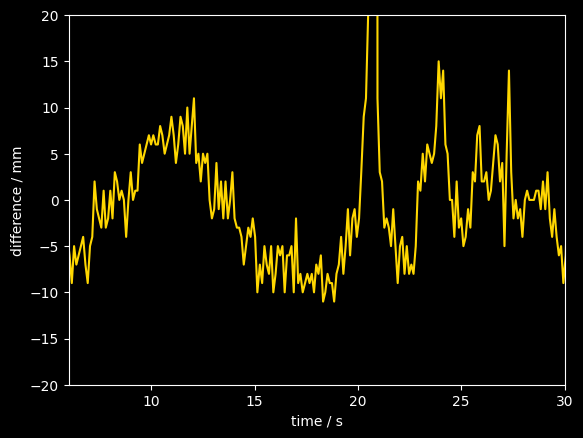

In [91]:
plt.plot(df['time / s'], df[' distance ultrasonic / mm'] - df['distance motor / mm'], 'gold')
plt.xlabel('time / s')
plt.ylabel('difference / mm')
plt.xlim([6,30])
plt.ylim([-20,20])

plt.show()
# plt.savefig('difference.png', transparent=True)

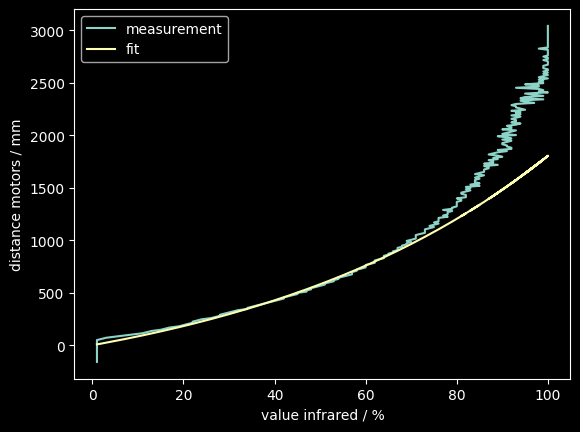

In [93]:
# df_fit = df.iloc[190:-20,:]
df_fit = df

xdata = df_fit[' distance infrared / %'].to_numpy()
ydata = df_fit['distance motor / mm'].to_numpy()

# popt, _ = curve_fit(func, xdata, ydata, p0 = [100, 0] )


plt.plot(xdata, ydata, label = 'measurement')
plt.plot(xdata, func(xdata, *popt), label = 'fit' )
plt.legend()
plt.xlabel('value infrared / %')
plt.ylabel('distance motors / mm')

plt.show()
# plt.savefig('infrared_fit.png', transparent=True)

# popt